In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from matplotlib.colors import ListedColormap

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Breast Cancer Wisconsin.csv')

from subprocess import check_output
print(check_output(["ls", "/content/drive/MyDrive/Colab Notebooks"]).decode("utf8"))


Breast Cancer Wisconsin.csv
Copie de  TP_Linear_Regression.ipynb
covid_vaccination_vs_death_ratio.csv
kernel-pca.ipynb
Linear_Regression0.ipynb
Polynomial-Regression.ipynb
SVM.ipynb
 TP_Linear_Regression.ipynb
tp Logistic_Regression.ipynb



In [ ]:
data.isnull().sum()
data.drop('Unnamed: 32', axis = 1, inplace = True )

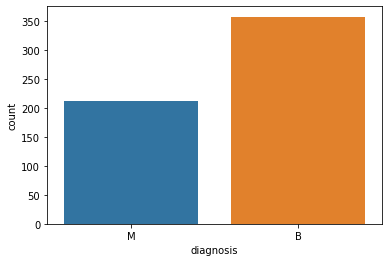

In [ ]:
sns.countplot(x = 'diagnosis', data = data)


x = data.iloc[:, 3:]

y = data.diagnosis
y = y.map({'M':1,'B':0})

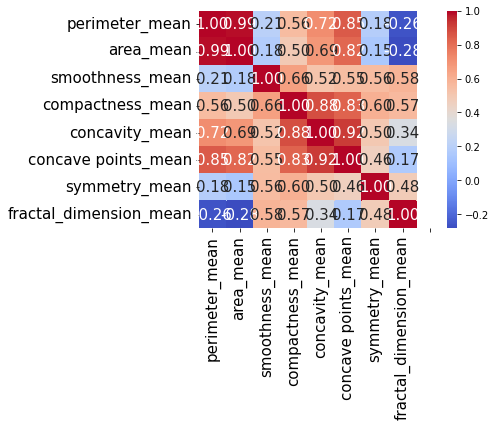

In [ ]:
x.columns
features_mean = x.columns[1:9]
features_se = x.columns[9:19]
features_worst = x.columns[19:]

#Correlation between sets of features
corr = x[features_mean].corr()
g = sns.heatmap(corr, cbar = True, annot=True, annot_kws={'size': 15}, fmt= '.2f', square = True, cmap = 'coolwarm' )
g.set_xticklabels(rotation=90, labels = features_mean, size = 15)
g.set_yticklabels(rotation=0, labels = features_mean, size = 15)
g.set_xticks(np.arange(.5,9.5,1))
plt.rcParams["figure.figsize"] = (15,15)

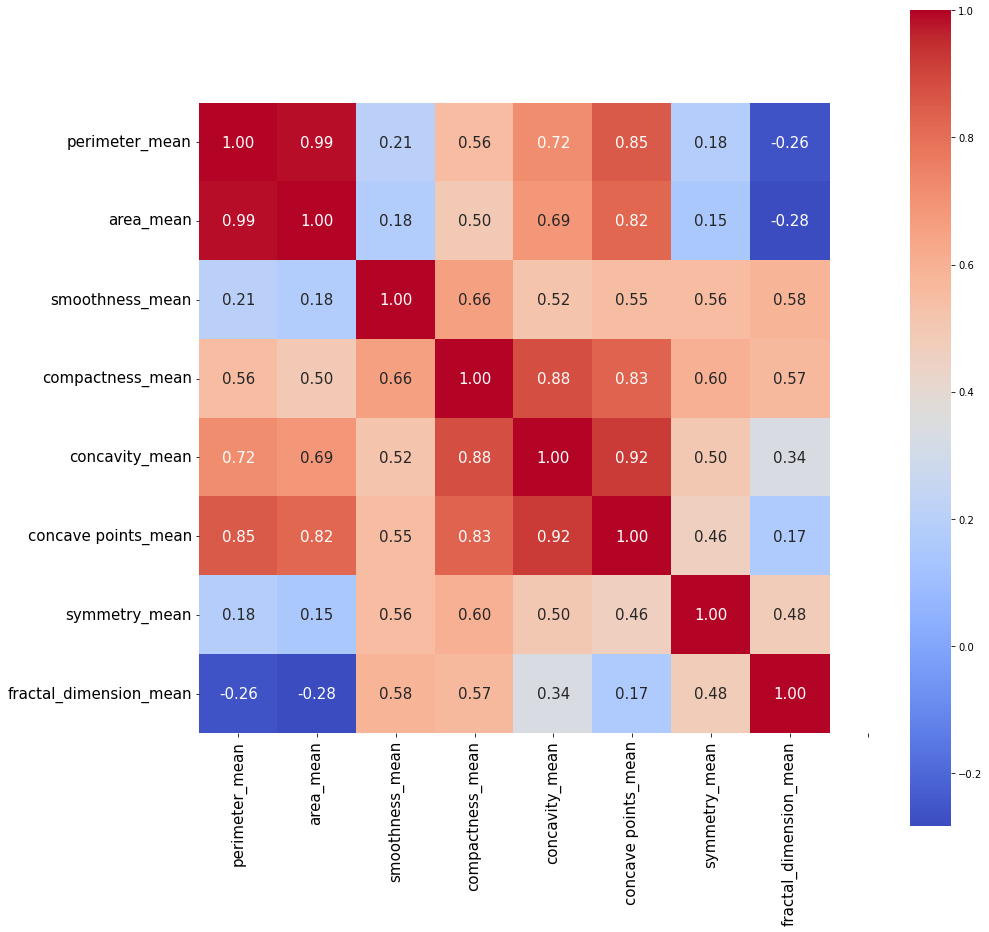

In [ ]:
x.columns
features_mean = x.columns[1:9]
features_se = x.columns[9:19]
features_worst = x.columns[19:]

#Correlation between sets of features
corr = x[features_mean].corr()
g = sns.heatmap(corr, cbar = True, annot=True, annot_kws={'size': 15}, fmt= '.2f', square = True, cmap = 'coolwarm' )
g.set_xticklabels(rotation=90, labels = features_mean, size = 15)
g.set_yticklabels(rotation=0, labels = features_mean, size = 15)
g.set_xticks(np.arange(.5,9.5,1))
plt.rcParams["figure.figsize"] = (15,15)

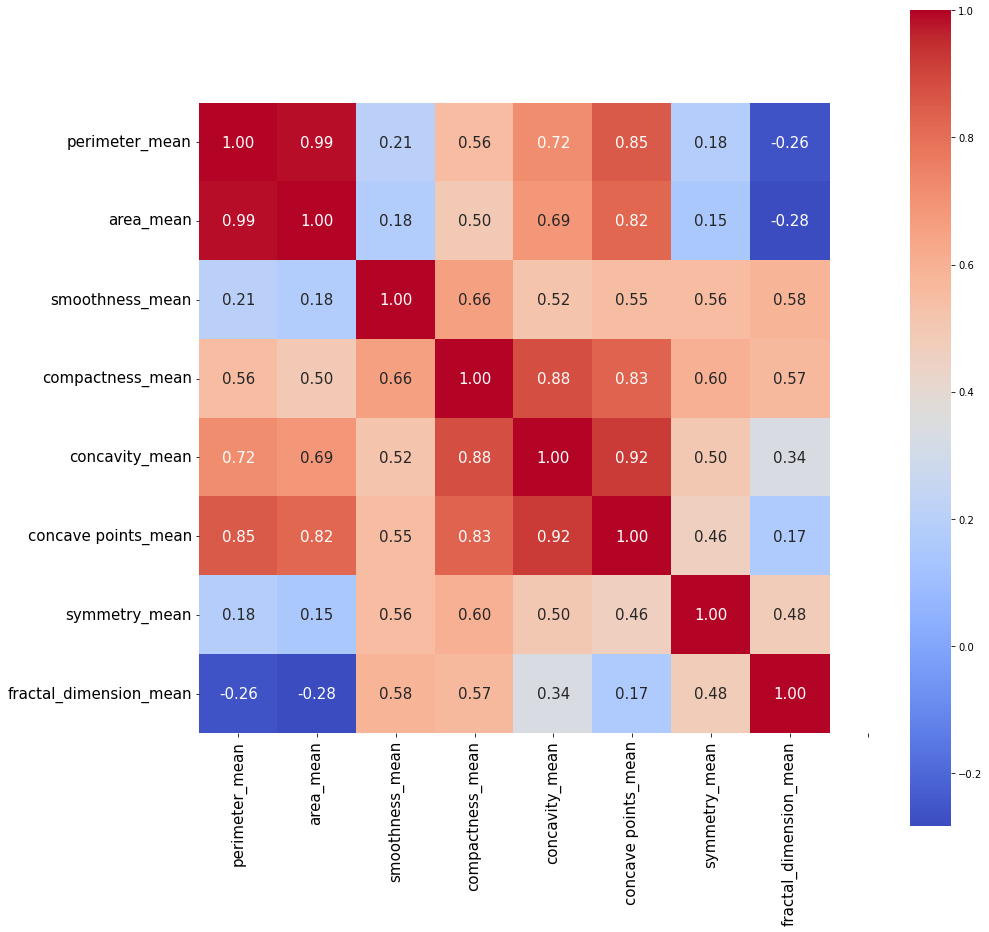

In [ ]:
x.columns
features_mean = x.columns[1:9]
features_se = x.columns[9:19]
features_worst = x.columns[19:]

#Correlation between sets of features
corr = x[features_mean].corr()
g = sns.heatmap(corr, cbar = True, annot=True, annot_kws={'size': 15}, fmt= '.2f', square = True, cmap = 'coolwarm' )
g.set_xticklabels(rotation=90, labels = features_mean, size = 15)
g.set_yticklabels(rotation=0, labels = features_mean, size = 15)
g.set_xticks(np.arange(.5,9.5,1))
plt.rcParams["figure.figsize"] = (15,15)

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)


#Split data to get hold out test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .1)

In [ ]:
def BoundaryLine(kernel, algo, algo_name):
    reduction = KernelPCA(n_components=2, kernel = kernel)
    x_train_reduced = reduction.fit_transform(x_train)
    x_test_reduced = reduction.transform(x_test)
    
    classifier = algo
    classifier.fit(x_train_reduced, y_train)
    
    y_pred = classifier.predict(x_test_reduced)
    

    #Boundary Line
    X_set, y_set = np.concatenate([x_train_reduced, x_test_reduced], axis = 0), np.concatenate([y_train, y_test], axis = 0)
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.5, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
      #plt.title('{} Boundary Line with {} PCA' .format(algo_name, kernel))
    #plt.xlabel('Component 1')
    #plt.ylabel('Component 2')
    #plt.legend()
    plt.xticks(fontsize = 3)
    plt.yticks(fontsize = 3)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

KeyboardInterrupt: ignored

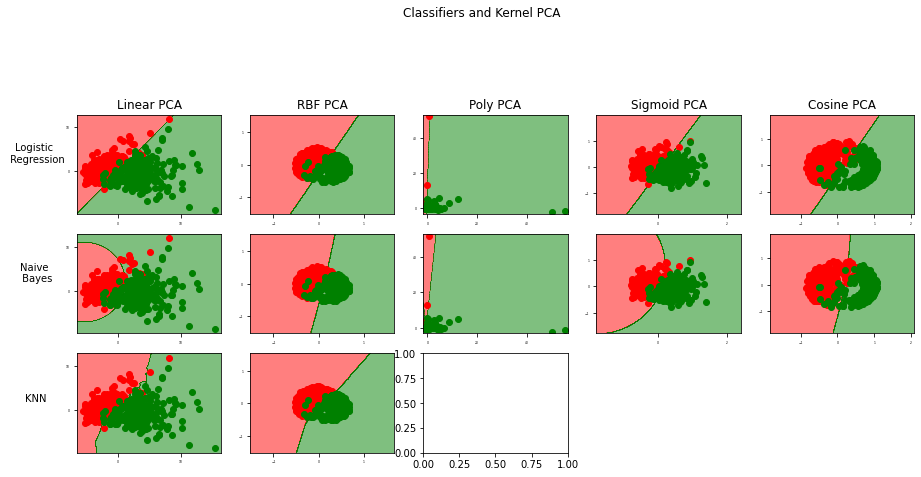

In [ ]:
fig = plt.figure()

fig.suptitle('Classifiers and Kernel PCA')
#Logistic Regression   
from sklearn.linear_model import LogisticRegression
ax = plt.subplot(7,5,1)
ax.set_title('Linear PCA')
ax.set_ylabel('Logistic \n Regression', rotation = 0, labelpad=30, fontsize = 10)
BoundaryLine('linear', LogisticRegression(), "Logistic Regression")

ax = plt.subplot(7,5,2)
ax.set_title('RBF PCA')
BoundaryLine('rbf', LogisticRegression(), "Logistic Regression")

ax = plt.subplot(7,5,3)
ax.set_title('Poly PCA')
BoundaryLine('poly', LogisticRegression(), "Logistic Regression")

ax = plt.subplot(7,5,4)
ax.set_title('Sigmoid PCA')
BoundaryLine('sigmoid', LogisticRegression(), "Logistic Regression")

ax = plt.subplot(7,5,5)
ax.set_title('Cosine PCA')
BoundaryLine('cosine', LogisticRegression(), "Logistic Regression")


#Naive Bayes
from sklearn.naive_bayes import GaussianNB
ax = plt.subplot(7,5,6)
ax.set_ylabel('Naive \n Bayes', rotation = 0, labelpad=30, fontsize = 10)
BoundaryLine('linear', GaussianNB(), "Naive Bayes")
ax = plt.subplot(7,5,7)
BoundaryLine('rbf', GaussianNB(), "Naive Bayes")
ax = plt.subplot(7,5,8)
BoundaryLine('poly', GaussianNB(), "Naive Bayes")
ax = plt.subplot(7,5,9)
BoundaryLine('sigmoid', GaussianNB(), "Naive Bayes")
ax = plt.subplot(7,5,10)
BoundaryLine('cosine', GaussianNB(), "Naive Bayes")

#K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
ax = plt.subplot(7,5,11)
ax.set_ylabel('KNN', rotation = 0, labelpad=30, fontsize = 10)
BoundaryLine('linear', KNeighborsClassifier(), "KNN")
ax = plt.subplot(7,5,12)
BoundaryLine('rbf', KNeighborsClassifier(), "KNN")
ax = plt.subplot(7,5,13)
BoundaryLine('poly', KNeighborsClassifier(), "KNN")
ax = plt.subplot(7,5,14)
BoundaryLine('sigmoid', KNeighborsClassifier(), "KNN")
ax = plt.subplot(7,5,15)
BoundaryLine('cosine', KNeighborsClassifier(), "KNN")

#Random Forest
from sklearn.ensemble import RandomForestClassifier
ax = plt.subplot(7,5,16)
ax.set_ylabel('Random \n Forest', rotation = 0, labelpad=30, fontsize = 10)
BoundaryLine('linear', RandomForestClassifier(), "Random Forest")
ax = plt.subplot(7,5,17)
BoundaryLine('rbf', RandomForestClassifier(), "Random Forest")
ax = plt.subplot(7,5,18)
BoundaryLine('poly', RandomForestClassifier(), "Random Forest")
ax = plt.subplot(7,5,19)
BoundaryLine('sigmoid', RandomForestClassifier(), "Random Forest")
ax = plt.subplot(7,5,20)
BoundaryLine('cosine', RandomForestClassifier(), "Random Forest")

#Support Vector - linear
from sklearn.svm import SVC
ax = plt.subplot(7,5,21)
ax.set_ylabel('SVM \n Linear', rotation = 0, labelpad=30, fontsize = 10)
BoundaryLine('linear', SVC(kernel = 'linear'), "SVM - Linear")
ax = plt.subplot(7,5,22)
BoundaryLine('rbf', SVC(kernel = 'linear'), "SVM - Linear")
ax = plt.subplot(7,5,23)
BoundaryLine('poly', SVC(kernel = 'linear'), "SVM - Linear")
ax = plt.subplot(7,5,24)
BoundaryLine('sigmoid', SVC(kernel = 'linear'), "SVM - Linear")
ax = plt.subplot(7,5,25)
BoundaryLine('cosine', SVC(kernel = 'linear'), "SVM - Linear")

#Support Vector - RBF
ax = plt.subplot(7,5,26)
ax.set_ylabel('SVM \n rbf', rotation = 0, labelpad=30, fontsize = 10)
BoundaryLine('linear', SVC(kernel = 'rbf'), "SVM - rbf")
ax = plt.subplot(7,5,27)
BoundaryLine('rbf', SVC(kernel = 'rbf'), "SVM - rbf")
ax = plt.subplot(7,5,28)
BoundaryLine('poly', SVC(kernel = 'rbf'), "SVM - rbf")
ax = plt.subplot(7,5,29)
BoundaryLine('sigmoid', SVC(kernel = 'rbf'), "SVM - rbf")
ax = plt.subplot(7,5,30)
BoundaryLine('cosine', SVC(kernel = 'rbf'), "SVM - rbf")


#Support Vector - Poly
ax = plt.subplot(7,5,31)
ax.set_ylabel('SVM \n poly', rotation = 0, labelpad=30, fontsize = 10)
BoundaryLine('linear', SVC(kernel = 'poly'), "SVM - poly")
ax = plt.subplot(7,5,32)
BoundaryLine('rbf', SVC(kernel = 'poly'), "SVM - poly")
ax = plt.subplot(7,5,33)
BoundaryLine('poly', SVC(kernel = 'poly'), "SVM - poly")
ax = plt.subplot(7,5,34)
BoundaryLine('sigmoid', SVC(kernel = 'poly'), "SVM - poly")
ax = plt.subplot(7,5,35)
BoundaryLine('cosine', SVC(kernel = 'poly'), "SVM - poly")

fig.show()
              

In [ ]:
def BoundaryLine(kernel, algo, algo_name):
    reduction = KernelPCA(n_components=2, kernel = kernel)
    x_train_reduced = reduction.fit_transform(x_train)
    x_test_reduced = reduction.transform(x_test)
    
    classifier = algo
    classifier.fit(x_train_reduced, y_train)
    
    y_pred = classifier.predict(x_test_reduced)
    
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    plt.subplot(2,1,1)
    #Train set boundary
    X_set, y_set = x_train_reduced, y_train
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.6, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('{} Boundary Line with {} PCA (Train Set)' .format(algo_name, kernel))
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    
    
    plt.subplot(2,1,2)
    #Test set boundary
    X_set, y_set = x_test_reduced, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.6, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('{} Boundary Line with {} PCA (Test Set)' .format(algo_name, kernel))
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    plt.tight_layout()
       

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

[[36  1]
 [ 2 18]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        37
           1       0.95      0.90      0.92        20

    accuracy                           0.95        57
   macro avg       0.95      0.94      0.94        57
weighted avg       0.95      0.95      0.95        57



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

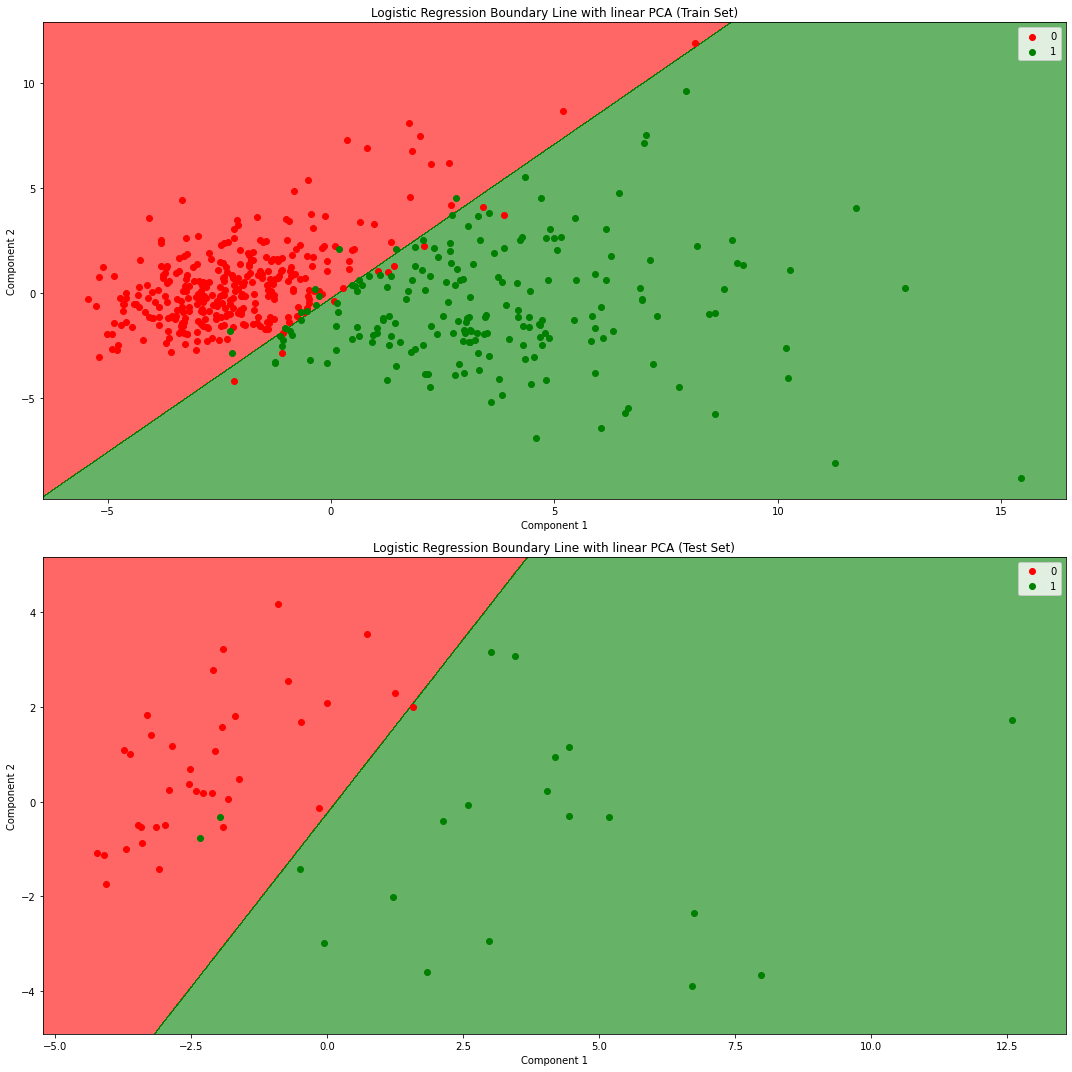

In [ ]:
BoundaryLine('linear', LogisticRegression(), "Logistic Regression")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


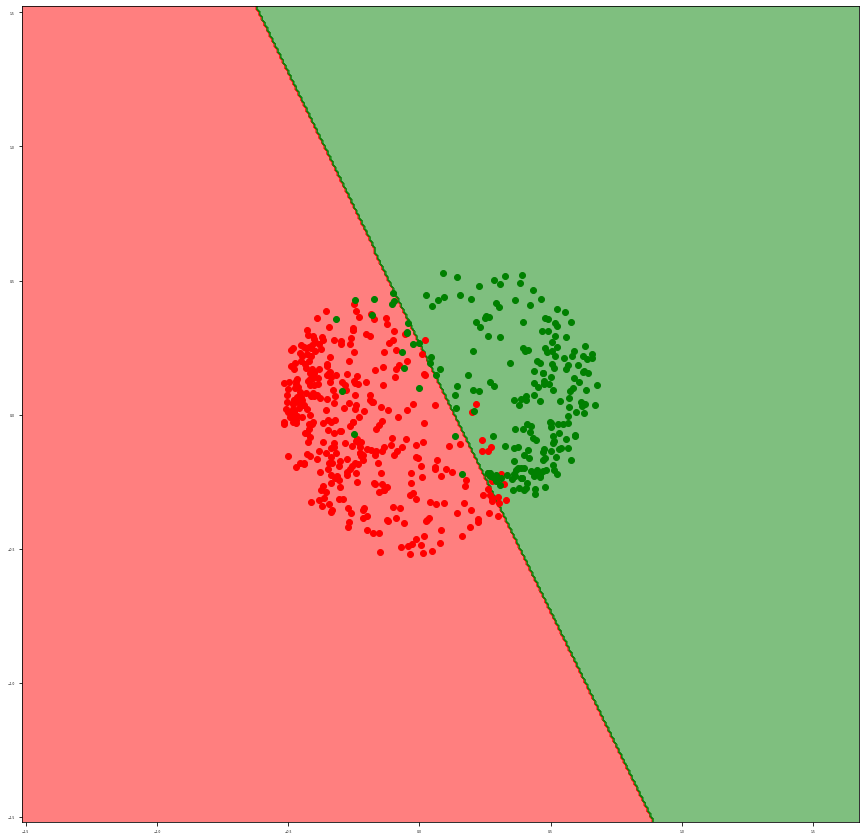

In [ ]:
BoundaryLine('rbf', LogisticRegression(), "Logistic Regression")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


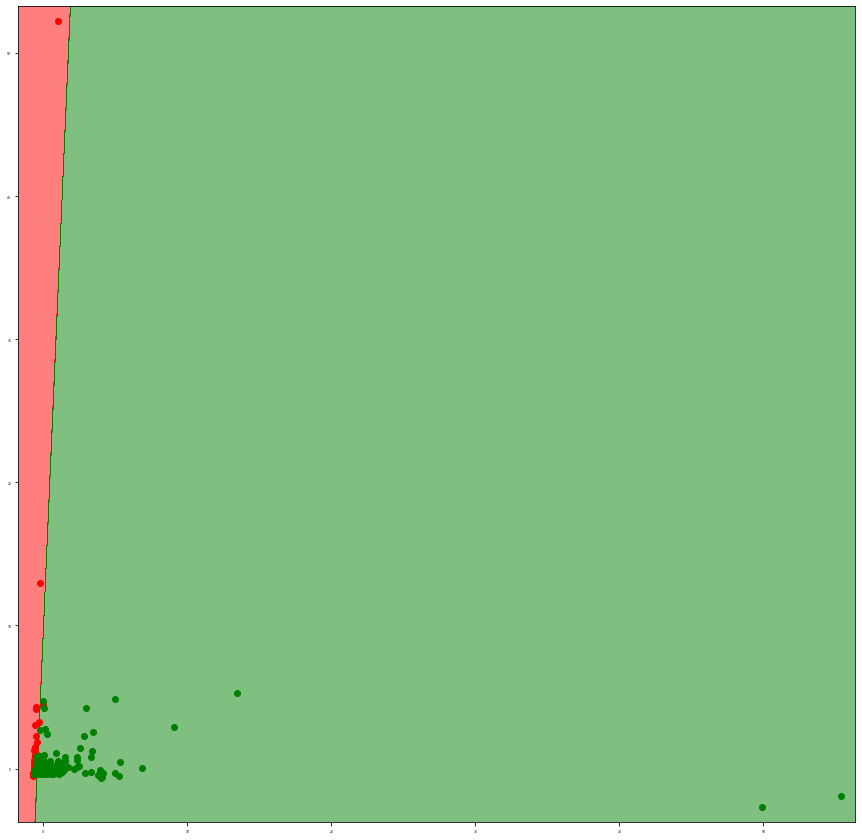

In [ ]:
BoundaryLine('poly', LogisticRegression(), "Logistic Regression")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


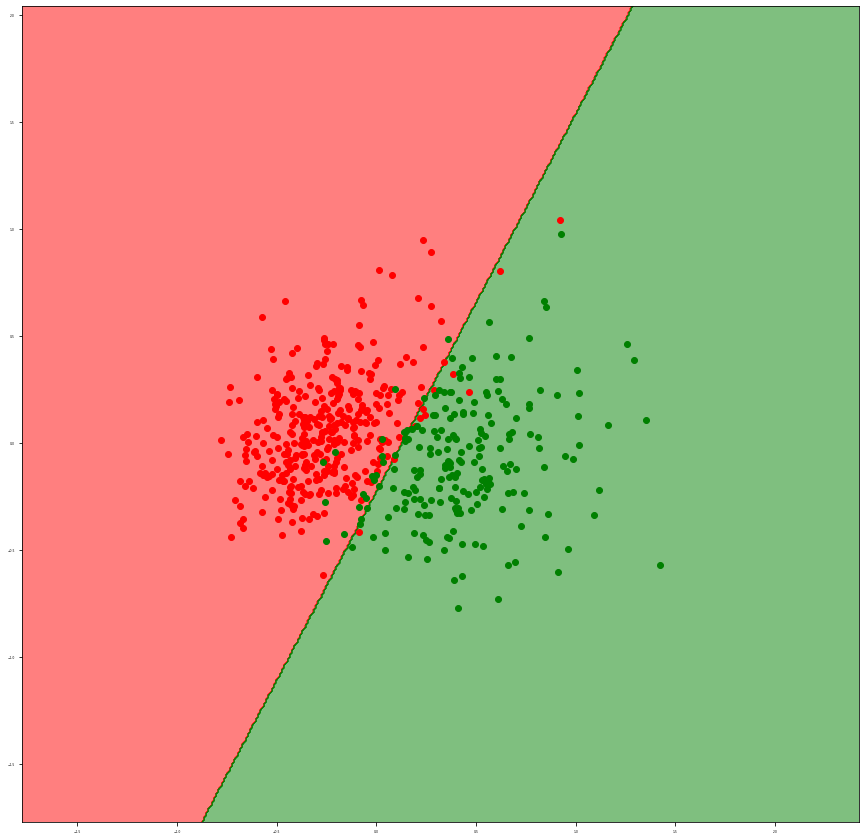

In [ ]:
BoundaryLine('sigmoid', LogisticRegression(), "Logistic Regression")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


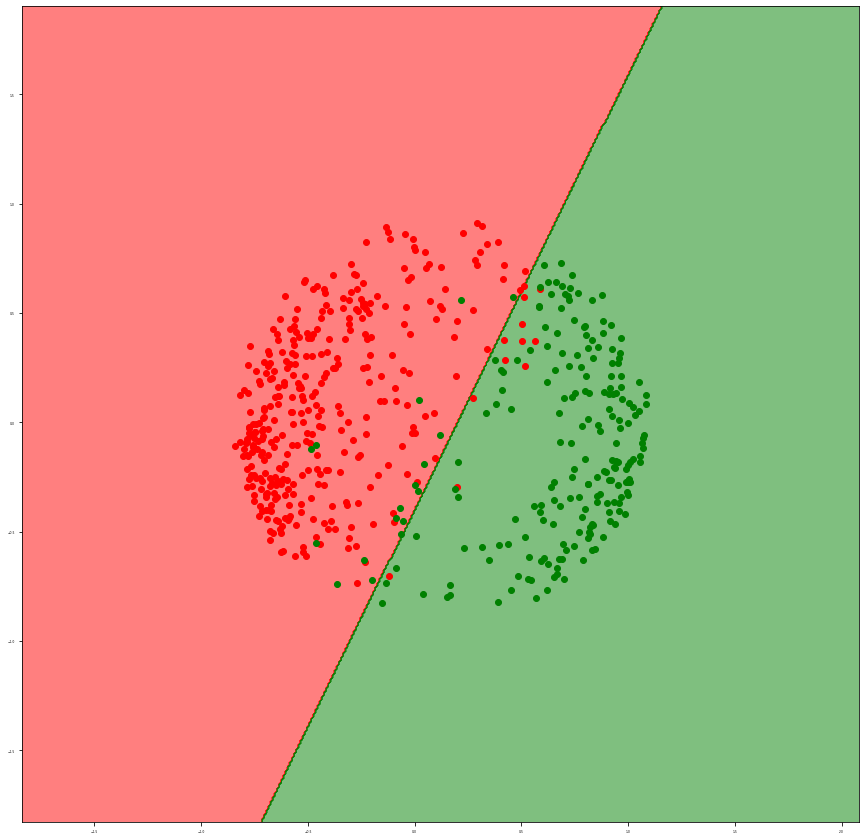

In [ ]:
BoundaryLine('cosine', LogisticRegression(), "Logistic Regression")

In [ ]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


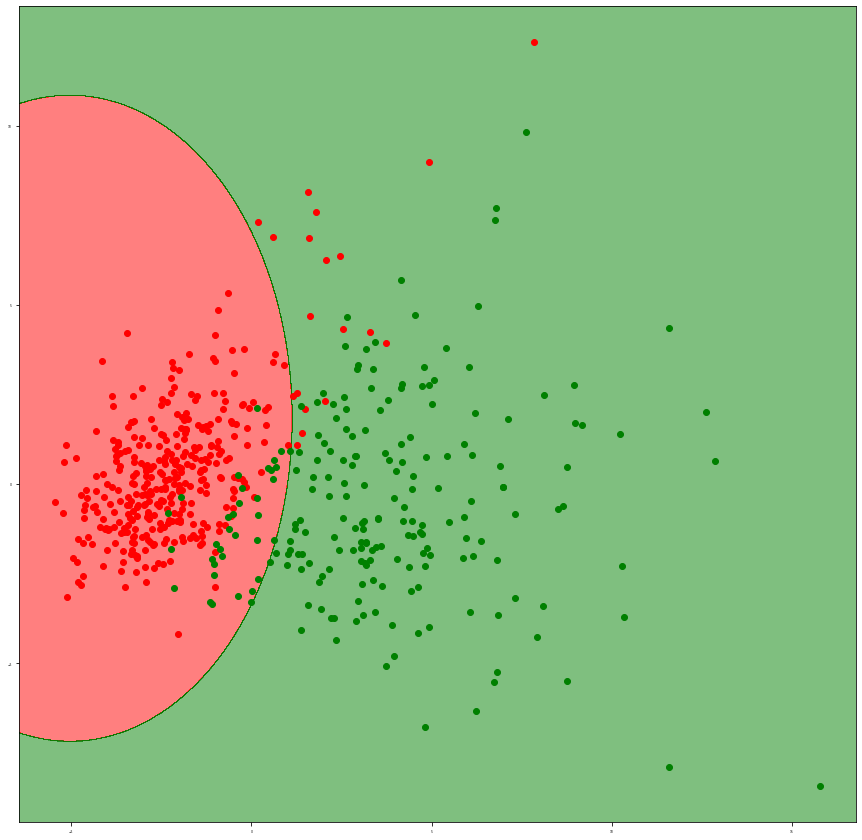

In [ ]:
BoundaryLine('linear', GaussianNB(), "Naive Bayes")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


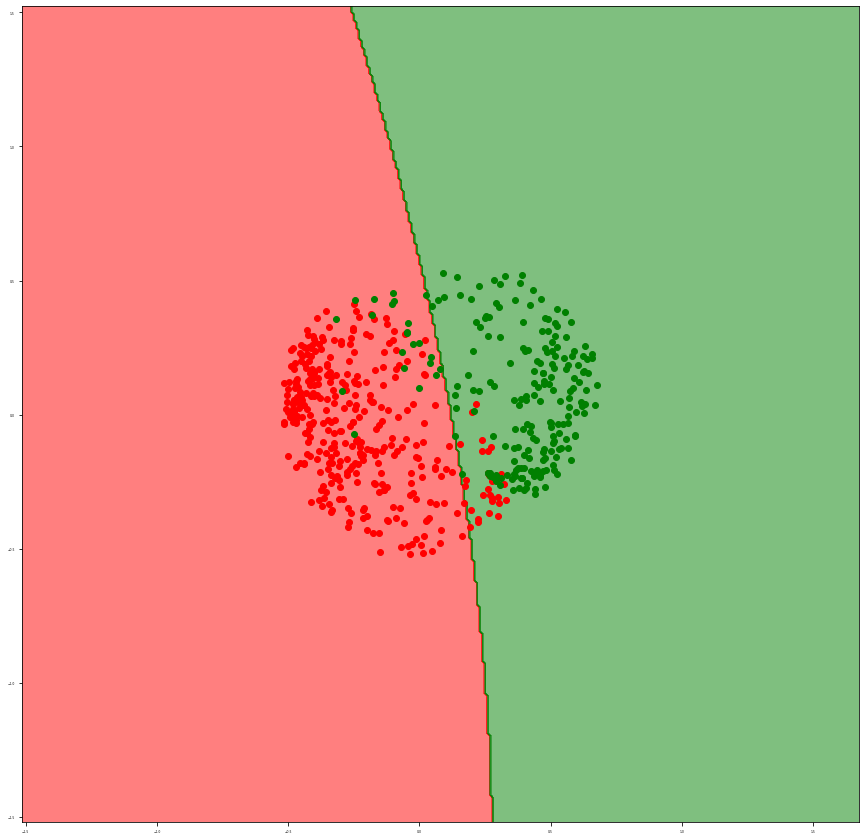

In [ ]:
BoundaryLine('rbf', GaussianNB(), "Naive Bayes")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


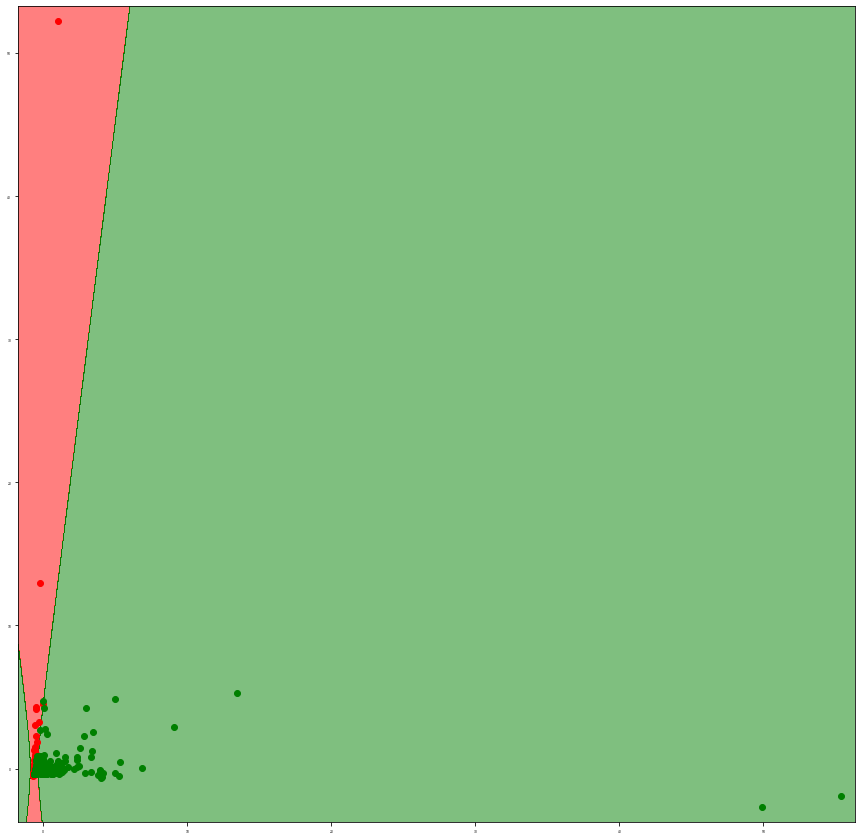

In [ ]:
BoundaryLine('poly', GaussianNB(), "Naive Bayes")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


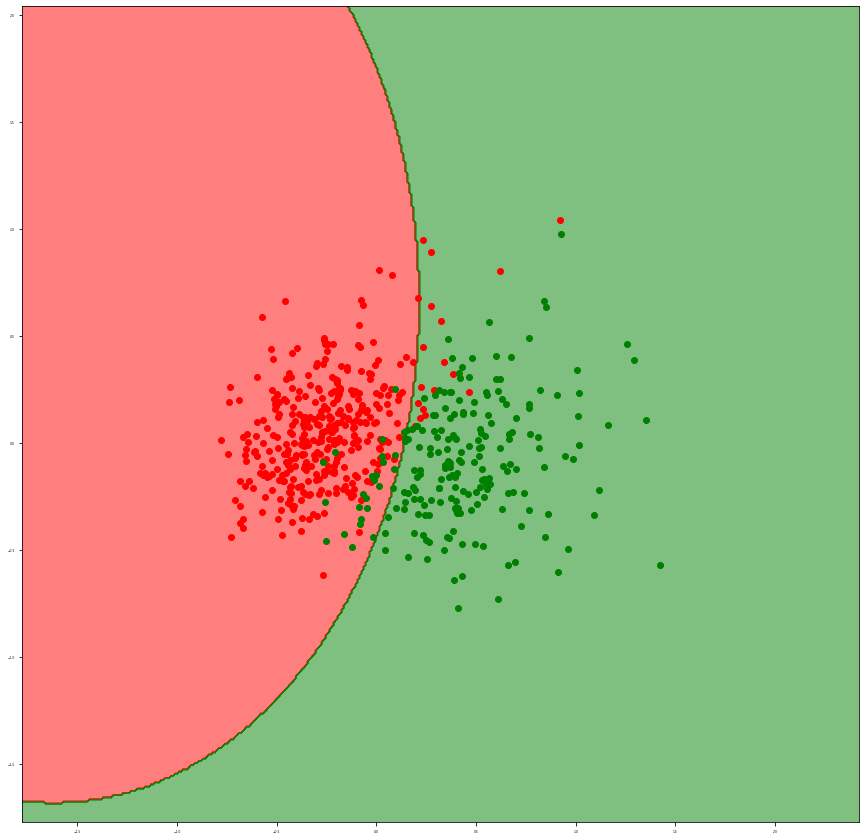

In [ ]:
BoundaryLine('sigmoid', GaussianNB(), "Naive Bayes")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


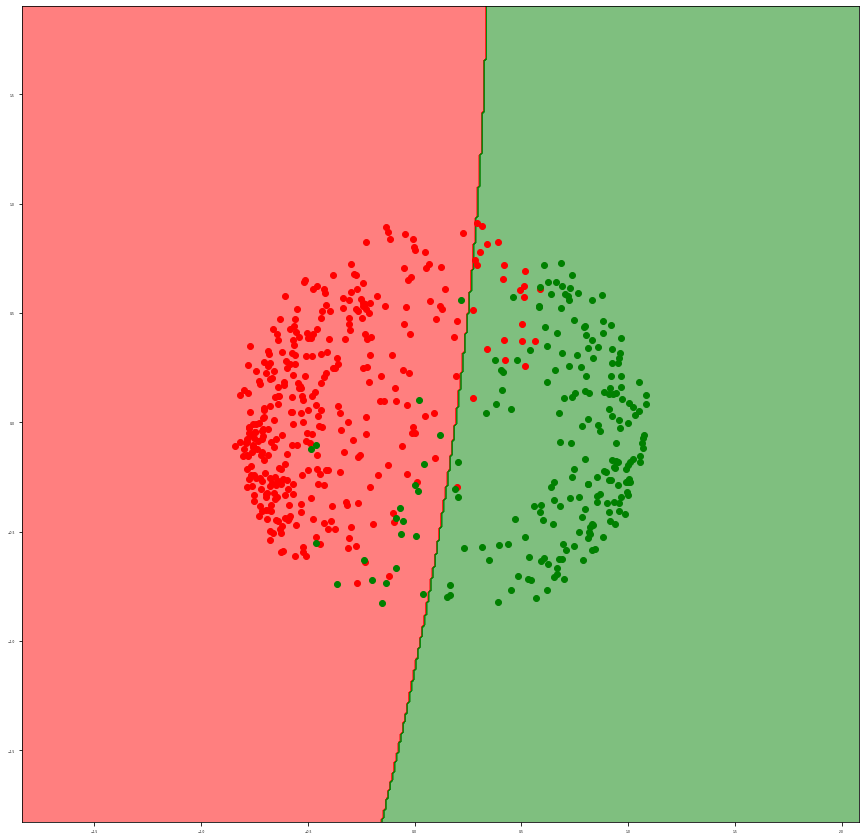

In [ ]:
BoundaryLine('cosine', GaussianNB(), "Naive Bayes")

In [ ]:
#K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


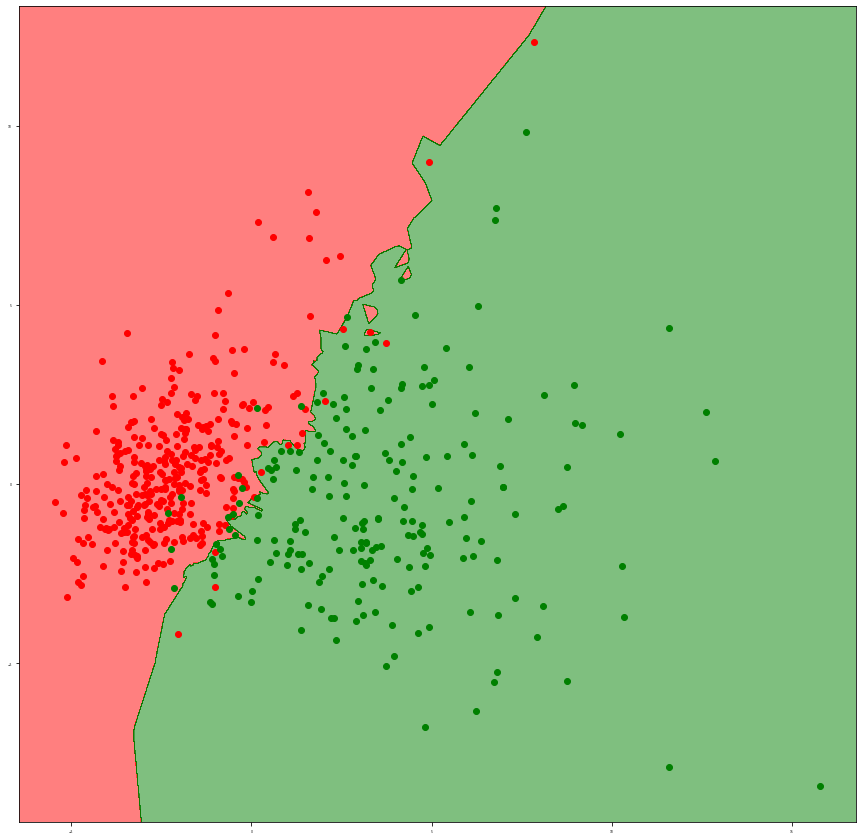

In [ ]:
BoundaryLine('linear', KNeighborsClassifier(), "KNN")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


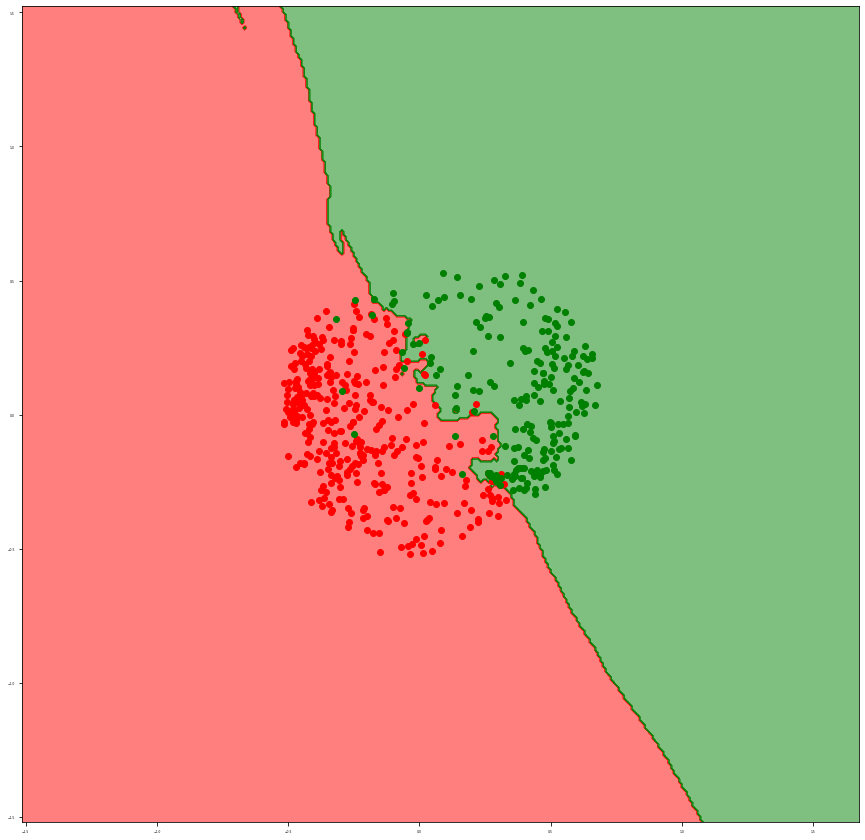

In [ ]:
BoundaryLine('rbf', KNeighborsClassifier(), "KNN")

In [1]:
BoundaryLine('poly', KNeighborsClassifier(), "KNN")

NameError: ignored

In [2]:
BoundaryLine('sigmoid', KNeighborsClassifier(), "KNN")

NameError: ignored

In [ ]:
BoundaryLine('cosine', KNeighborsClassifier(), "KNN")

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
BoundaryLine('linear', RandomForestClassifier(), "Random Forest")

In [ ]:
BoundaryLine('rbf', RandomForestClassifier(), "Random Forest")

In [ ]:
BoundaryLine('poly', RandomForestClassifier(), "Random Forest")

In [ ]:
BoundaryLine('sigmoid', RandomForestClassifier(), "Random Forest")

In [ ]:
BoundaryLine('cosine', RandomForestClassifier(), "Random Forest")

In [ ]:
#Support Vector - linear
from sklearn.svm import SVC

In [ ]:
BoundaryLine('linear', SVC(kernel = 'linear'), "SVM - Linear")

In [ ]:
BoundaryLine('rbf', SVC(kernel = 'linear'), "SVM - Linear")

In [ ]:
BoundaryLine('poly', SVC(kernel = 'linear'), "SVM - Linear")

In [ ]:
BoundaryLine('sigmoid', SVC(kernel = 'linear'), "SVM - Linear")

In [ ]:
BoundaryLine('cosine', SVC(kernel = 'linear'), "SVM - Linear")

In [ ]:
#Support Vector - RBF
BoundaryLine('linear', SVC(kernel = 'rbf'), "SVM - rbf")

In [ ]:
BoundaryLine('rbf', SVC(kernel = 'rbf'), "SVM - rbf")

In [ ]:
BoundaryLine('poly', SVC(kernel = 'rbf'), "SVM - rbf")

In [ ]:
BoundaryLine('sigmoid', SVC(kernel = 'rbf'), "SVM - rbf")

In [ ]:
BoundaryLine('cosine', SVC(kernel = 'rbf'), "SVM - rbf")

In [ ]:
#Support Vector - Poly
BoundaryLine('linear', SVC(kernel = 'poly'), "SVM - poly")

In [ ]:
BoundaryLine('rbf', SVC(kernel = 'poly'), "SVM - poly")

In [ ]:
BoundaryLine('poly', SVC(kernel = 'poly'), "SVM - poly")

In [ ]:
BoundaryLine('sigmoid', SVC(kernel = 'poly'), "SVM - poly")

In [ ]:
BoundaryLine('cosine', SVC(kernel = 'poly'), "SVM - poly")